In [ ]:
!pip install deepface opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.7/171.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt


26-02-09 13:51:10 - Directory /root/.deepface has been created
26-02-09 13:51:10 - Directory /root/.deepface/weights has been created


In [ ]:
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving women.jpeg to women (2).jpeg


In [ ]:
try:
    faces = DeepFace.extract_faces(
        img_path=image_path,
        enforce_detection=True
    )

    print(f"✅ Number of faces detected: {len(faces)}")

except Exception:
    print("❌ No human faces detected")
    faces = []


✅ Number of faces detected: 1


In [ ]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for i, face in enumerate(faces):
    fa = face["facial_area"]
    x, y, w, h = fa["x"], fa["y"], fa["w"], fa["h"]

    face_crop = img[y:y+h, x:x+w]

    result = DeepFace.analyze(
        img_path=face_crop,
        actions=['gender'],
        enforce_detection=False
    )

    gender = result[0]['dominant_gender']
    confidence = result[0]['gender'][gender]

    label = f"{gender} ({confidence:.1f}%)"

    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
    cv2.putText(img, label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    print(f"Face {i+1}: {label}")


26-02-09 13:51:32 - 🔗 gender_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5 to /root/.deepface/weights/gender_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:12<00:00, 42.2MB/s]


Face 1: Woman (100.0%)


✅ Face detected
Predicted Gender: Woman
Confidence: 99.9989


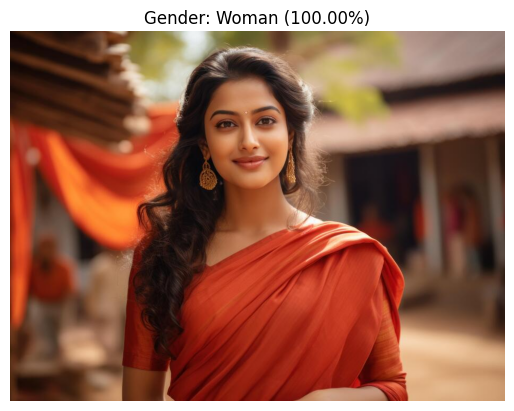

In [ ]:
try:
    # Detect face first
    detections = DeepFace.extract_faces(
        img_path=image_path,
        enforce_detection=True
    )

    # If face is detected, analyze gender
    result = DeepFace.analyze(
        img_path=image_path,
        actions=['gender'],
        enforce_detection=True
    )

    gender = result[0]['dominant_gender']
    confidence = result[0]['gender'][gender]

    print("✅ Face detected")
    print("Predicted Gender:", gender)
    print("Confidence:", confidence)

    # Display image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Gender: {gender} ({confidence:.2f}%)")
    plt.show()

except Exception as e:
    print("❌ No human face detected in the image")
    print("Please upload an image containing a clear human face.")


In [ ]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.title(f"Gender: {gender} ({confidence:.3f}%)")
plt.show()


NameError: name 'cv2' is not defined